<a href="https://colab.research.google.com/github/kitiluck/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

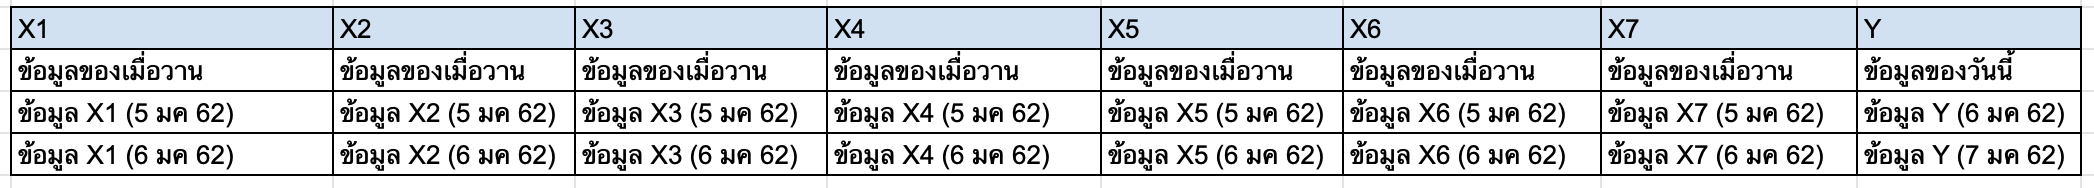

# Lode data

In [429]:
import pandas as pd
import numpy as np

# Load Excel from Drive

In [430]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [431]:
import os # os การเข้าไปใน path ใน google drive
os.chdir('/content/drive/MyDrive/BSC_DPDM2023')

!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/BSC_DPDM2023


## ความกดอากาศ

In [432]:
Air_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Air_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Air_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Air_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Air_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)


เปลี่ยนชื่อ column

In [433]:
C ={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}

In [476]:
Air_K.rename(columns=C)
Air_NA.rename(columns=C)
Air_S.rename(columns=C)
Air_NO.rename(columns=C)
Air_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.57,1008.67,1011.74,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.11,1009.83,-,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.23,1011.63,1014.75,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.81,1014.81,1016.39,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,-,-,-,1011.348571


## ความชื้นสัมพัทธ์

In [435]:
Rhum_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Rhum_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Rhum_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Rhum_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Rhum_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)


เปลี่ยนชื่อ column


In [436]:
Rhum_K.rename(columns=C)
Rhum_NA.rename(columns=C)
Rhum_S.rename(columns=C)
Rhum_NO.rename(columns=C)
Rhum_L.rename(columns=C)


,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,87,84,92,91,90,91,88,...,80,81,81,80,80,76,79,80,75,84
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,72,80,80,84,82,83,78,...,82,89,87,87,85,86,88,84,-,82
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,84,83,88,87,85,76,82,...,75,70,78,81,77,79,81,73,67,80
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,78,77,75,74,77,77,77,...,72,75,79,76,88,86,82,78,92,76
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,85,83,79,72,73,72,66,...,59,63,67,64,66,71,-,-,-,69


## ความเร็วลม

In [437]:
Wind_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Wind_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Wind_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Wind_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [438]:
Wind_K.rename(columns=C)
Wind_NA.rename(columns=C)
Wind_S.rename(columns=C)
Wind_NO.rename(columns=C)
Wind_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,1,3,3,3,2,...,2,2,2,2,2,3,2,2,1,1.838710
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,1,2,2,2,2,...,2,2,1,2,1,2,3,2,-,1.833333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,4,3,2,2,4,1,...,3,3,2,1,2,2,2,3,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,1,1,2,2,1,2,1,...,1,2,2,2,3,3,1,2,2,2.032258
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,1,1,3,1,1,2,...,4,3,1,2,1,2,3,3,-,2.133333


## จำนวนเมฆ

In [439]:
Cloud_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_Li = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4,dtype={'Unnamed: 34':int})

ตัดจำนวน column ที่เกิน

In [440]:
Cloud_L = Cloud_Li.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])
Cloud_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2


เปลี่ยนชื่อ column

In [441]:
Cloud_K.rename(columns=C)
Cloud_NA.rename(columns=C)
Cloud_S.rename(columns=C)
Cloud_NO.rename(columns=C)
Cloud_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,2,2,2,2,2,2,1,3,6,3
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,3,6,3,4,6,6,8,6,-,3
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,6,2,6,8,4,2,1,4,2,3
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,1,2,4,3,8,10,7,5,9,3
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,4,0,1,2,2,3,8,6,3,3


## ปริมาณฝน

In [442]:
Rainfall_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rainfall_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rainfall_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rainfall_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rainfall_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [443]:
Rainfall_K.rename(columns=C)
Rainfall_NA.rename(columns=C)
Rainfall_S.rename(columns=C)
Rainfall_NO.rename(columns=C)
Rainfall_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0,0,0.6,2,4.8,0,4.6,...,0,0,0,0,0,0,0,2,0,15
6,4,353201-เลย จ.เลย,2012-11-01,0,0,0,1,0,0,0,...,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
8,6,353201-เลย จ.เลย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2.8,1,0,0,7.2,11
9,7,353201-เลย จ.เลย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  อุณหภูมิจุดน้ำค้าง

In [444]:
Dew_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dew_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dew_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dew_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dew_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [445]:
Dew_K.rename(columns=C)
Dew_NA.rename(columns=C)
Dew_S.rename(columns=C)
Dew_NO.rename(columns=C)
Dew_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


## อุณหภูมิต่ำสุด

In [446]:
Lower_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Lower_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Lower_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Lower_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Lower_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [447]:
Lower_K.rename(columns=C)
Lower_NA.rename(columns=C)
Lower_S.rename(columns=C)
Lower_NO.rename(columns=C)
Lower_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6
5,3,353201-เลย จ.เลย,2012-10-01,21.6,22.0,23.1,22.5,23.5,23.9,23.0,...,21.9,20.2,22.0,21.0,22.0,21.5,22,22.5,23.6,22.1
6,4,353201-เลย จ.เลย,2012-11-01,21,19.2,19.9,21.8,21.5,23.0,22.0,...,22.4,23.5,22.0,22.8,22.8,21.1,23,23.6,-,22.0
7,5,353201-เลย จ.เลย,2012-12-01,23,22.6,22.6,23.5,21.5,22.2,20.0,...,20.0,15.1,17.2,17.9,19.0,18.5,17.4,18.6,14.6,19.3
8,6,353201-เลย จ.เลย,2013-01-01,13,15.3,16.8,17.0,15.3,15.8,14.4,...,17.2,19.9,20.0,19.2,21.0,19.5,20.3,18.8,21.4,17.3
9,7,353201-เลย จ.เลย,2013-02-01,19,18.9,18.2,20.0,18.6,19.4,18.6,...,19.0,16.5,17.5,20.5,21.5,23,-,-,-,19.5


## อุณหภูมิตุ้มแห้ง


In [448]:
Dry_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [449]:
Dry_K.rename(columns=C)
Dry_NA.rename(columns=C)
Dry_S.rename(columns=C)
Dry_NO.rename(columns=C)
Dry_L.rename(columns=C)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4
5,3,353201-เลย จ.เลย,2012-10-01,26.4,26.9,25.3,25.9,26.6,26.3,26.3,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.7
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,6,353201-เลย จ.เลย,2013-01-01,19.5,22.2,23.8,23.2,22.2,21.6,21.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24,21.5,22.9
9,7,353201-เลย จ.เลย,2013-02-01,22.3,23.4,23.8,25.9,25.9,26.9,27.4,...,25.2,24.7,26.1,28.4,29.6,29.0,-,-,-,26.4


## ตรวจสอบขนาดข้อมูล

In [450]:
Dew_L.shape

(50, 35)

In [451]:
Dry_L.shape

(50, 35)

In [473]:
Air_L.shape

(55, 35)

จำนวนขนาดข้อมูลของ อุณหภูมิจุดน้ำค้าง และ อุณหภูมิตุ้มเเห้ง มีจำนวน ไม่เท่ากับ ข้อมูลอื่น

# เช็คค่า missing data และ แก้ค่า missing ด้วยค่าเฉลี่ย

#### เปลี่ยนค่า - ด้วย replace

In [492]:
## ความกดอากาศ
Air_KK = Air_K.replace('-',np.NaN) # เปลี่ยน - เป็น NaN

In [491]:
Air_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Unnamed: 34,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000,1014.790000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.70,1011.83,1010.386452,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,NaN,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1016.29,1013.54,1011.60,1010.58,1009.61,1009.90,1011.64,1014.86,1011.622581,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1013.40,1011.79,1010.17,1007.95,1006.82,NaN,NaN,NaN,1011.207500,1011.207500


In [483]:
Air_NA1 = Air_NA.replace('-',np.NaN)
Air_S1 = Air_S.replace('-',np.NaN)
Air_NO1 = Air_NO.replace('-',np.NaN)
Air_L1 = Air_L.replace('-',np.NaN)

In [484]:
## ความชื้นสัมพัทธ์
Rhum_K1 = Rhum_K.replace('-',np.NaN)
Rhum_NA1 = Rhum_NA.replace('-',np.NaN)
Rhum_S1 = Rhum_S .replace('-',np.NaN)
Rhum_NO1 = Rhum_NO.replace('-',np.NaN)
Rhum_L1 = Rhum_L.replace('-',np.NaN)

In [485]:
## ความเร็วลม
Wind_K1 = Wind_K.replace('-',np.NaN)
Wind_NA1 = Wind_NA.replace('-',np.NaN)
Wind_S1 = Wind_S .replace('-',np.NaN)
Wind_NO1 = Wind_NO.replace('-',np.NaN)
Wind_L1 = Wind_L.replace('-',np.NaN)

In [486]:
## จำนวนเมฆ
Cloud_K1 = Cloud_K.replace('-',np.NaN)
Cloud_NA1 = Cloud_NA.replace('-',np.NaN)
Cloud_S1 = Cloud_S .replace('-',np.NaN)
Cloud_NO1 = Cloud_NO.replace('-',np.NaN)
Cloud_L1 = Cloud_L.replace('-',np.NaN)

In [487]:
## ปริมาณฝน
Rainfall_K1 = Rainfall_K.replace('-',np.NaN)
Rainfall_NA1 = Rainfall_NA.replace('-',np.NaN)
Rainfall_S1 = Rainfall_S .replace('-',np.NaN)
Rainfall_NO1 = Rainfall_NO.replace('-',np.NaN)
Rainfall_L1 = Rainfall_L.replace('-',np.NaN)

## ปริมาณฝน แทนค่า T
Rainfall_K2 = Rainfall_K1.replace('T',0.09)
Rainfall_NA2 = Rainfall_NA1.replace('T',0.09)
Rainfall_S2 = Rainfall_S1 .replace('T',0.09)
Rainfall_NO2 = Rainfall_NO1.replace('T',0.09)
Rainfall_L2 = Rainfall_L1.replace('T',0.09)

In [488]:
## อุณหภูมิจุดน้ำค้าง
Dew_K1 = Dew_K.replace('-',np.NaN)
Dew_NA1 = Dew_NA.replace('-',np.NaN)
Dew_S1 = Dew_S .replace('-',np.NaN)
Dew_NO1 = Dew_NO.replace('-',np.NaN)
Dew_L1 = Dew_L.replace('-',np.NaN)

In [489]:
## อุณหภูมิต่ำสุด
Lower_K1 = Lower_K.replace('-',np.NaN)
Lower_NA1 = Lower_NA.replace('-',np.NaN)
Lower_S1 = Lower_S .replace('-',np.NaN)
Lower_NO1 = Lower_NO.replace('-',np.NaN)
Lower_L1 = Lower_L.replace('-',np.NaN)

In [490]:
## อุณหภูมิตุ้มแห้ง
Dry_K1 = Dry_K.replace('-',np.NaN)
Dry_NA1 = Dry_NA.replace('-',np.NaN)
Dry_S1 = Dry_S .replace('-',np.NaN)
Dry_NO1 = Dry_NO.replace('-',np.NaN)
Dry_L1 = Dry_L.replace('-',np.NaN)

## แก้ค่า Missing data เป็นค่าเฉลี่ย ด้วยการแทนค่า เฉลี่ยใน NaN

In [493]:
## ความกดอากาศ
for i in range(len(Air_KK['ที่'])):
  Air_KK.iloc[i,:] = Air_KK.iloc[i,:].fillna(Air_KK.iloc[i]['เฉลี่ย'])

KeyError: 'ที่'

In [ ]:
Dry_NA1.isnull().any() # เช็คค่า Missing

In [ ]:
for i in range(len(Air_NA1['ที่'])):
  Air_NA1.iloc[i,:] = Air_NA1.iloc[i,:].fillna(Air_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_S1['ที่'])):
  Air_S1.iloc[i,:] = Air_S1.iloc[i,:].fillna(Air_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_NO1['ที่'])):
  Air_NO1.iloc[i,:] = Air_NO1.iloc[i,:].fillna(Air_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_L1['ที่'])):
  Air_L1.iloc[i,:] = Air_L1.iloc[i,:].fillna(Air_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## ความชื้นสัมพัทธ์
for i in range(len(Rhum_K1['ที่'])):
  Rhum_K1.iloc[i,:] = Rhum_K1.iloc[i,:].fillna(Rhum_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_NA1['ที่'])):
  Rhum_NA1.iloc[i,:] = Rhum_NA1.iloc[i,:].fillna(Rhum_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_S1['ที่'])):
  Rhum_S1.iloc[i,:] = Rhum_S1.iloc[i,:].fillna(Rhum_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_NO1['ที่'])):
  Rhum_NO1.iloc[i,:] = Rhum_NO1.iloc[i,:].fillna(Rhum_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_L1['ที่'])):
  Rhum_L1.iloc[i,:] = Rhum_L1.iloc[i,:].fillna(Rhum_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## ความเร็วลม
for i in range(len(Wind_K1['ที่'])):
  Wind_K1.iloc[i,:] = Wind_K1.iloc[i,:].fillna(Wind_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_NA1['ที่'])):
  Wind_NA1.iloc[i,:] = Wind_NA1.iloc[i,:].fillna(Wind_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_S1['ที่'])):
  Wind_S1.iloc[i,:] = Wind_S1.iloc[i,:].fillna(Wind_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_NO1['ที่'])):
  Wind_NO1.iloc[i,:] = Wind_NO1.iloc[i,:].fillna(Wind_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_L1['ที่'])):
  Wind_L1.iloc[i,:] = Wind_L1.iloc[i,:].fillna(Wind_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## จำนวนเมฆ
for i in range(len(Cloud_K1['ที่'])):
  Cloud_K1.iloc[i,:] = Cloud_K1.iloc[i,:].fillna(Cloud_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_NA1['ที่'])):
  Cloud_NA1.iloc[i,:] = Cloud_NA1.iloc[i,:].fillna(Cloud_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_S1['ที่'])):
  Cloud_S1.iloc[i,:] = Cloud_S1.iloc[i,:].fillna(Cloud_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_NO1['ที่'])):
  Cloud_NO1.iloc[i,:] = Cloud_NO1.iloc[i,:].fillna(Cloud_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_L1['ที่'])):
  Cloud_L1.iloc[i,:] = Cloud_L1.iloc[i,:].fillna(Cloud_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## ปริมาณฝน
for i in range(len(Rainfall_K2['ที่'])):
  Rainfall_K2.iloc[i,:] = Rainfall_K2.iloc[i,:].fillna(Rainfall_K2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_NA2['ที่'])):
  Rainfall_NA2.iloc[i,:] = Rainfall_NA2.iloc[i,:].fillna(Rainfall_NA2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_S2['ที่'])):
  Rainfall_S2.iloc[i,:] = Rainfall_S2.iloc[i,:].fillna(Rainfall_S2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_NO2['ที่'])):
  Rainfall_NO2.iloc[i,:] = Rainfall_NO2.iloc[i,:].fillna(Rainfall_NO2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_L2['ที่'])):
  Rainfall_L2.iloc[i,:] = Rainfall_L2.iloc[i,:].fillna(Rainfall_L2.iloc[i]['เฉลี่ย'])

In [ ]:
## อุณหภูมิจุดน้ำค้าง
for i in range(len(Dew_K1['ที่'])):
  Dew_K1.iloc[i,:] = Dew_K1.iloc[i,:].fillna(Dew_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_NA1['ที่'])):
  Dew_NA1.iloc[i,:] = Dew_NA1.iloc[i,:].fillna(Dew_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_S1['ที่'])):
  Dew_S1.iloc[i,:] = Dew_S1.iloc[i,:].fillna(Dew_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_NO1['ที่'])):
  Dew_NO1.iloc[i,:] = Dew_NO1.iloc[i,:].fillna(Dew_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_L1['ที่'])):
  Dew_L1.iloc[i,:] = Dew_L1.iloc[i,:].fillna(Dew_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## อุณหภูมิต่ำสุด
for i in range(len(Lower_K1['ที่'])):
  Lower_K1.iloc[i,:] = Lower_K1.iloc[i,:].fillna(Lower_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_NA1['ที่'])):
  Lower_NA1.iloc[i,:] = Lower_NA1.iloc[i,:].fillna(Lower_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_S1['ที่'])):
  Lower_S1.iloc[i,:] = Lower_S1.iloc[i,:].fillna(Lower_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_NO1['ที่'])):
  Lower_NO1.iloc[i,:] = Lower_NO1.iloc[i,:].fillna(Lower_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_L1['ที่'])):
  Lower_L1.iloc[i,:] = Lower_L1.iloc[i,:].fillna(Lower_L1.iloc[i]['เฉลี่ย'])

In [ ]:
## อุณหภูมิตุ้มแห้ง
for i in range(len(Dry_K1['ที่'])):
  Dry_K1.iloc[i,:] = Dry_K1.iloc[i,:].fillna(Dry_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_NA1['ที่'])):
  Dry_NA1.iloc[i,:] = Dry_NA1.iloc[i,:].fillna(Dry_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_S1['ที่'])):
  Dry_S1.iloc[i,:] = Dry_S1.iloc[i,:].fillna(Dry_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_NO1['ที่'])):
  Dry_NO1.iloc[i,:] = Dry_NO1.iloc[i,:].fillna(Dry_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_L1['ที่'])):
  Dry_L1.iloc[i,:] = Dry_L1.iloc[i,:].fillna(Dry_L1.iloc[i]['เฉลี่ย'])

#### เช็คค่า Missing data

จากการเช็คค่า Missing พบว่าทุก data จะมีค่า Missing ที่ คอลัม 29 30 31

# เพิ่ม column จังหวัด

In [ ]:
# ความกดอากาศ
Air_KK['จังหวัด']='ขอนเเก่น'
Air_NA1['จังหวัด']='นครพนม'
Air_S1['จังหวัด']='สกล'
Air_NO1['จังหวัด']='หนองคาย'
Air_L1['จังหวัด']='เลย'

In [ ]:
# ความชื้นสัมพัทธ์
Rhum_K1['จังหวัด']='ขอนเเก่น'
Rhum_NA1['จังหวัด']='นครพนม'
Rhum_S1['จังหวัด']='สกล'
Rhum_NO1['จังหวัด']='หนองคาย'
Rhum_L1['จังหวัด']='เลย'

In [ ]:
# ความเร็วลม
Wind_K1['จังหวัด']='ขอนเเก่น'
Wind_NA1['จังหวัด']='นครพนม'
Wind_S1['จังหวัด']='สกล'
Wind_NO1['จังหวัด']='หนองคาย'
Wind_L1['จังหวัด']='เลย'

In [ ]:
# จำนวนเมฆ
Cloud_K1['จังหวัด']='ขอนเเก่น'
Cloud_NA1['จังหวัด']='นครพนม'
Cloud_S1['จังหวัด']='สกล'
Cloud_NO1['จังหวัด']='หนองคาย'
Cloud_L1['จังหวัด']='เลย'

In [ ]:
# ปริมาณน้ำฝน
Rainfall_K2['จังหวัด']='ขอนเเก่น'
Rainfall_NA2['จังหวัด']='นครพนม'
Rainfall_S2['จังหวัด']='สกล'
Rainfall_NO2['จังหวัด']='หนองคาย'
Rainfall_L2['จังหวัด']='เลย'

In [ ]:
# อุณหภูมิจุดน้ำค้าง
Dew_K1['จังหวัด']='ขอนเเก่น'
Dew_NA1['จังหวัด']='นครพนม'
Dew_S1['จังหวัด']='สกล'
Dew_NO1['จังหวัด']='หนองคาย'
Dew_L1['จังหวัด']='เลย'

In [ ]:
# อุณหภูมิต่ำสุด
Lower_K1['จังหวัด']='ขอนเเก่น'
Lower_NA1['จังหวัด']='นครพนม'
Lower_S1['จังหวัด']='สกล'
Lower_NO1['จังหวัด']='หนองคาย'
Lower_L1['จังหวัด']='เลย'

In [ ]:
# อุณหภูมิตุ้มเเห้ง
Dry_K1['จังหวัด']='ขอนเเก่น'
Dry_NA1['จังหวัด']='นครพนม'
Dry_S1['จังหวัด']='สกล'
Dry_NO1['จังหวัด']='หนองคาย'
Dry_L1['จังหวัด']='เลย'

# เรียงตารางใหม่

In [ ]:
Air_K_Set = Air_KK.set_index(['สถานที่','เดือน/ปี',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NA_Set = Air_NA1.set_index(['สถานที่','เดือน/ปี',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})

In [ ]:
Air_K_Set